MSE for run1: 177.73008728027344
MSE for run2: 174.77224731445312
MSE for run3: 117.77688598632812
MSE for run4: 101.50589752197266
MSE for run5: 83.7369384765625
MSE for run6: 72.3318099975586
MSE for run7: 73.57592010498047
MSE for run8: 45.68901824951172
MSE for run9: 50.55818176269531
MSE for run10: 48.34292221069336
MSE for run11: 43.92479705810547
MSE for run12: 45.52002716064453
MSE for run13: 43.887508392333984
MSE for run14: 43.33749771118164
MSE for run15: 38.164642333984375
MSE for run16: 34.07359313964844
MSE for run17: 39.04813766479492
MSE for run18: 40.26102828979492
MSE for run19: 41.66749954223633
MSE for run20: 40.16733169555664
MSE for run21: 34.87166213989258
MSE for run22: 40.80277633666992
MSE for run23: 29.372983932495117
MSE for run24: 38.27851486206055
MSE for run25: 39.86882781982422
MSE for run26: 38.851348876953125
MSE for run27: 32.92169952392578
MSE for run28: 34.78460693359375
MSE for run29: 41.05276107788086
MSE for run30: 41.3043098449707
MSE for run31:

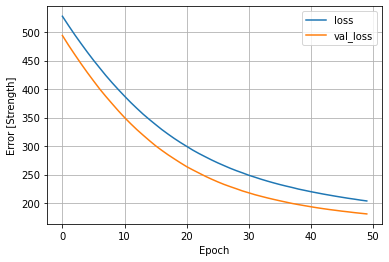

In [7]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('concrete_data.csv')

train, test = train_test_split(df, test_size=0.3)

train_labels = train.pop('Strength')
test_labels  = test.pop('Strength')

train =(train-train.mean())/train.std()
test =(test-test.mean())/test.std()

model = keras.Sequential(
    [
        keras.layers.Dense(10, activation="relu", input_shape=(train.shape[1],)),
        keras.layers.Dense(1),
    ]
)

model.compile(optimizer='adam',
              loss='mean_squared_error')

history = model.fit(
    train,
    train_labels,
    epochs=50,
    #calculate validation results on 20% of training data
    verbose=0,
    validation_split=0.2
)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Strength]')
  plt.legend()
  plt.grid(True)

test_mse = []

for i in range(50):
    train, test = train_test_split(df, test_size=0.3, random_state=i)

    train_labels = train.pop('Strength')
    test_labels  = test.pop('Strength')

    train =(train-train.mean())/train.std()
    test =(test-test.mean())/test.std()
    
    history = model.fit(train,
                            train_labels,
                            epochs=50,
                            #calculate validation results on 20% of training data
                            verbose=0,
                            validation_split=0.2
                        )
    MSE=model.evaluate(test, test_labels, verbose=0 )
    y_pred = model.predict(test)
    
    mean_square_error = mean_squared_error(test_labels, y_pred)
    test_mse.append(mean_square_error)
    print("MSE for run"+str(i+1)+": "+str(MSE))
    if i ==0:
        plot_loss(history)
    else:
        pass

mean of MSE results:  48.80873440205436
std of MSE results:  31.1319128092336


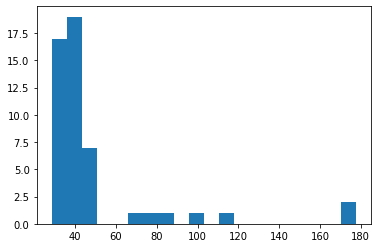

In [8]:
# plot the distribution of the results
plt.hist(test_mse, bins=20)
print('mean of MSE results: ', np.mean(test_mse))
print('std of MSE results: ', np.std(test_mse))

MSE for run1: 35.090843200683594
MSE for run2: 37.37302017211914
MSE for run3: 31.8199462890625
MSE for run4: 32.42618942260742
MSE for run5: 44.47848892211914
MSE for run6: 39.401248931884766
MSE for run7: 52.49139404296875
MSE for run8: 33.13649368286133
MSE for run9: 35.09037399291992
MSE for run10: 32.346397399902344
MSE for run11: 35.20391845703125
MSE for run12: 37.006683349609375
MSE for run13: 31.30162239074707
MSE for run14: 37.76826095581055
MSE for run15: 29.58287239074707
MSE for run16: 31.033193588256836
MSE for run17: 38.10188674926758
MSE for run18: 39.64815139770508
MSE for run19: 37.664188385009766
MSE for run20: 35.634159088134766
MSE for run21: 33.89175033569336
MSE for run22: 36.79294967651367
MSE for run23: 27.31157112121582
MSE for run24: 31.715171813964844
MSE for run25: 35.62746047973633
MSE for run26: 34.534908294677734
MSE for run27: 28.936397552490234
MSE for run28: 32.61250686645508
MSE for run29: 38.975135803222656
MSE for run30: 38.07478332519531
MSE for r

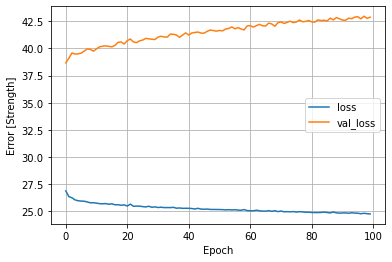

In [9]:
test_mse = []

for i in range(50):
    train, test = train_test_split(df, test_size=0.3, random_state=i)

    train_labels = train.pop('Strength')
    test_labels  = test.pop('Strength')

    train =(train-train.mean())/train.std()
    test =(test-test.mean())/test.std()
    
    history = model.fit(train,
                            train_labels,
                            epochs=100,
                            #calculate validation results on 20% of training data
                            verbose=0,
                            validation_split=0.2
                        )
    MSE=model.evaluate(test, test_labels, verbose=0 )
    y_pred = model.predict(test)
    
    mean_square_error = mean_squared_error(test_labels, y_pred)
    test_mse.append(mean_square_error)
    print("MSE for run"+str(i+1)+": "+str(MSE))
    if i ==0:
        plot_loss(history)
    else:
        pass

print('mean of MSE results: ', np.mean(test_mse))
print('std of MSE results: ', np.std(test_mse))

MSE for run1: 91.21173095703125
MSE for run2: 61.077632904052734
MSE for run3: 48.90447235107422
MSE for run4: 42.34722137451172
MSE for run5: 55.71510314941406
MSE for run6: 42.76048278808594
MSE for run7: 57.6260871887207
MSE for run8: 34.557621002197266
MSE for run9: 35.8715705871582
MSE for run10: 41.59611892700195
MSE for run11: 40.44757080078125
MSE for run12: 44.443180084228516
MSE for run13: 38.17190170288086
MSE for run14: 37.554439544677734
MSE for run15: 31.20414924621582
MSE for run16: 28.59607696533203
MSE for run17: 35.067989349365234
MSE for run18: 35.830360412597656
MSE for run19: 34.23345184326172
MSE for run20: 34.312129974365234
MSE for run21: 35.58557891845703
MSE for run22: 32.334102630615234
MSE for run23: 22.02488136291504
MSE for run24: 29.88149070739746
MSE for run25: 33.020389556884766
MSE for run26: 35.69327163696289
MSE for run27: 26.513450622558594
MSE for run28: 28.746374130249023
MSE for run29: 37.31804275512695
MSE for run30: 36.335289001464844
MSE for r

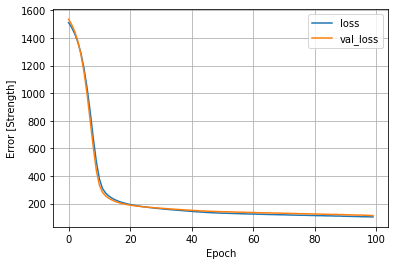

In [10]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, activation="relu", input_shape=(train.shape[1],)),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1),
    ]
)


model.compile(optimizer='adam',
              loss='mean_squared_error')

test_mse = []

for i in range(50):
    train, test = train_test_split(df, test_size=0.3, random_state=i)

    train_labels = train.pop('Strength')
    test_labels  = test.pop('Strength')

    train =(train-train.mean())/train.std()
    test =(test-test.mean())/test.std()
    
    history = model.fit(train,
                            train_labels,
                            epochs=100,
                            #calculate validation results on 20% of training data
                            verbose=0,
                            validation_split=0.2
                        )
    MSE=model.evaluate(test, test_labels, verbose=0 )
    y_pred = model.predict(test)
    
    mean_square_error = mean_squared_error(test_labels, y_pred)
    test_mse.append(mean_square_error)
    print("MSE for run"+str(i+1)+": "+str(MSE))
    if i ==0:
        plot_loss(history)
    else:
        pass

print('mean of MSE results: ', np.mean(test_mse))
print('std of MSE results: ', np.std(test_mse))